# Long Run su gomme medie

In [96]:
import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting

ff1.Cache.enable_cache('2023Australia')
race = ff1.get_session(2023, 'Australia', 'FP3')
race_laps = race.load_laps(with_telemetry=True)
race.load()


c:\Users\ricca\OneDrive\Desktop\F1dataAnalysis\env\Lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Australian Grand Prix - Practice 3 [v2.3.0]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
c:\Users\ricca\OneDrive\Desktop\F1dataAnalysis\env\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in 

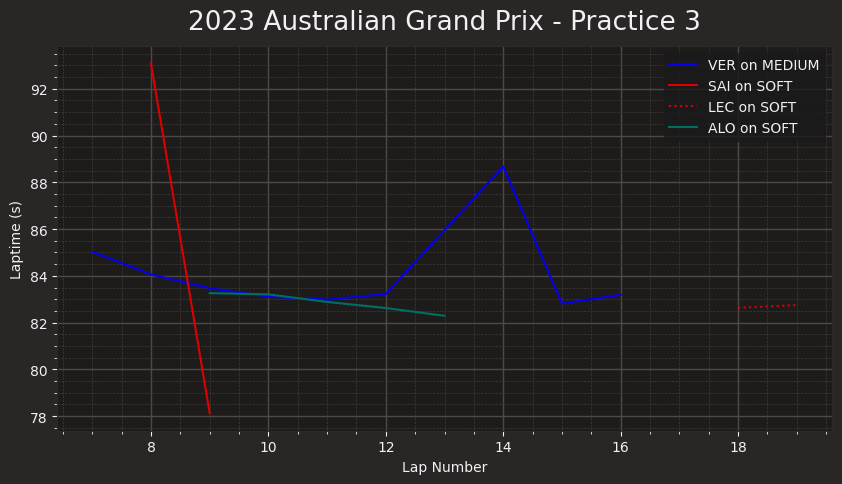

In [97]:
stint = 7
compound="SOFT"

race_laps['LapTimeSeconds'] = race_laps['LapTime'].dt.total_seconds()
race_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull())]

race_laps = race_laps.loc[((race_laps['Driver'] == "VER") & (race_laps['Compound'] == "MEDIUM") & (race_laps['IsAccurate']==True) & (race_laps['Stint']==2)) |
                          ((race_laps['Driver'] == "SAI") & (race_laps['Compound'] == compound) & (race_laps['IsAccurate']==True) & (race_laps['Stint']==3)) |
                          ((race_laps['Driver'] == "ALO") & (race_laps['Compound'] == compound) & (race_laps['IsAccurate']==True) & (race_laps['Stint']==3)) |
                          ((race_laps['Driver'] == "LEC") & (race_laps['Compound'] == compound) & (race_laps['IsAccurate']==True) & (race_laps['Stint']==2)) ] 

drivers_to_visualize = pd.unique(race_laps.Driver)

# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [10, 5]
ff1.plotting.setup_mpl()
# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots()
# Lap-by-lap longrun comparison
for driver in drivers_to_visualize:
    driver_laps = race_laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team', 'TyreLife']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    y = seconds=driver_laps['LapTimeSeconds']
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    if driver == "VER":
        ax.plot(x, y, label=driver+" on MEDIUM", color=ff1.plotting.team_color(team), linestyle=linestyle)
    else:
        ax.plot(x, y, label=driver+" on " + compound, color=ff1.plotting.team_color(team), linestyle=linestyle)
    
    # Append labels
    ax.set(ylabel = 'Laptime (s)')
    ax.set(xlabel = 'Lap Number')
    
    # Set title
    ax.set_title(f"{race.event.year} {race.event.EventName} - {race.name}")

    # Generate legend
    ax.legend()
    visualized_teams.append(team)
 
